In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 남자, 여자 데이터를 생성 군집화

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=[]
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)])#여
    data.append([random.randint(60,90),random.randint(170,200)])#남
# data

In [7]:
# 여자 
for female in data[:100:2]:
    print(female, end=' ')
print('\n------------------------------------')
for male in data[1:100:2]:
    print(male, end=' ')

[47, 153] [66, 144] [48, 176] [50, 155] [65, 157] [58, 144] [42, 164] [43, 175] [48, 156] [67, 168] [66, 166] [43, 175] [65, 171] [53, 152] [56, 177] [65, 152] [61, 142] [49, 146] [56, 164] [68, 165] [56, 152] [49, 172] [57, 172] [61, 164] [61, 168] [43, 161] [41, 141] [44, 172] [58, 167] [49, 151] [47, 153] [56, 153] [53, 152] [47, 141] [53, 156] [49, 168] [51, 169] [62, 158] [56, 160] [70, 158] [61, 144] [64, 152] [61, 179] [63, 156] [70, 152] [65, 168] [44, 159] [43, 145] [70, 143] [66, 166] 
------------------------------------
[74, 174] [88, 171] [86, 177] [71, 172] [79, 173] [63, 187] [75, 189] [79, 171] [73, 192] [86, 192] [71, 191] [77, 182] [61, 195] [61, 191] [62, 172] [77, 194] [85, 171] [84, 186] [74, 196] [60, 181] [82, 178] [64, 194] [89, 197] [65, 197] [66, 183] [79, 196] [70, 176] [77, 196] [72, 178] [68, 182] [83, 179] [63, 183] [79, 174] [70, 198] [63, 185] [65, 194] [76, 189] [72, 180] [71, 175] [89, 176] [66, 188] [85, 191] [84, 190] [84, 200] [71, 178] [86, 194] [7

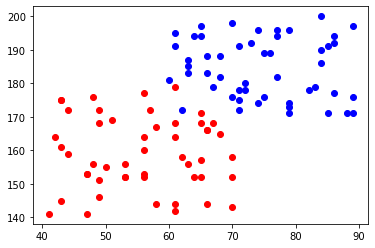

In [17]:
# x축: 몸무게, y축: 키
# 여자몸무게 : [d[0] for d in data[:100:2]]
# 여자키 : [d[1] for d in data[:100:2]]
# 남자몸무게 : [d[0] for d in data[1:100:2]]
# 남자키 : [d[1] for d in data[1:100:2]]
plt.plot([d[0] for d in data[:100:2]], [d[1] for d in data[:100:2]], 
         'o', color='r')
plt.plot([d[0] for d in data[1:100:2]], [d[1] for d in data[1:100:2]],
         'o', color='b')

In [28]:
# 초기 랜덤 지점 2개 생성
random_points =[[random.randint(40,90), random.randint(140,200)],
                [random.randint(40,90), random.randint(140,200)]]
print('초기 랜덤 기준점 :',random_points)

초기 랜덤 기준점 : [[50, 141], [62, 181]]


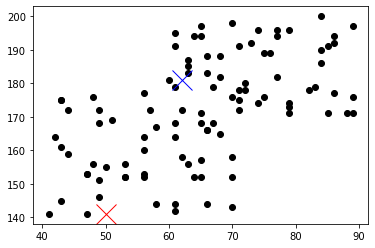

In [29]:
# plt.plot([d[0] for d in data], [d[1] for d in data], 'o',color='k')
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')
plt.plot(random_points[0][0], random_points[0][1], 
                         'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0], random_points[1][1], 
                         'x', color='b', markersize=20) # 기준점2

In [48]:
# 두 영역으로 나눌 빈 리스트 생성
group1 = []
group2 = []

In [31]:
# 두 영역을 나누기 위해 두점 사잉의 거리를 구하는 함수 (0,0) ~ (4,3) : root(4**2+3**2)
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [32]:
a = [0,0]; b=(4,3)
dist(a, b)

5.0

In [34]:
a = np.array([0,0]); b=np.array([4,3])
dist(a, b)

5.0

In [49]:
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 빨간 x랑 더 가까운 그룹
    else:
        group2.append(d) # 파란 x랑 더 가까운 그룹

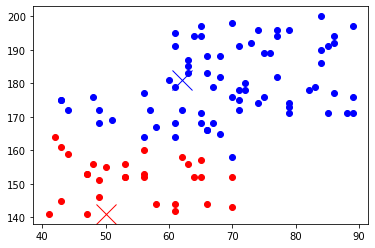

In [50]:
# 새로운 두 그룹(group1, group2)과 초기 랜점 기준점 그래프
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1], 'o', color='b')
plt.plot(random_points[0][0], random_points[0][1], 
                         'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0], random_points[1][1], 
                         'x', color='b', markersize=20) # 기준점2

In [52]:
# 기준점 이동
sumX = 0 ; sumY = 0
for g in group1:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점
new_points = []
new_points.append([sumX/len(group1), sumY/len(group1)])
sumX = 0; sumY =0
for g in group2:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX/len(group2), sumY/len(group2)])
print('초기 랜덤 기준점 :', random_points)
print('새 기준점 :', new_points)

초기 랜덤 기준점 : [[50, 141], [62, 181]]
새 기준점 : [[54.55172413793103, 151.51724137931035], [69.40845070422536, 180.0281690140845]]


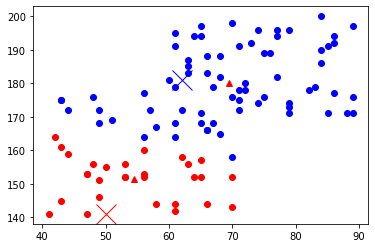

In [54]:
# 두 group과 초기 랜덤 기준점, 새 기준점
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1], 'o', color='b')
plt.plot(random_points[0][0], random_points[0][1], 
                         'x', color='r', markersize=20) # 초기 랜덤 기준점1
plt.plot(random_points[1][0], random_points[1][1], 
                         'x', color='b', markersize=20) # 초기 랜덤 기준점2
plt.plot(new_points[0][0], new_points[0][1],
                        '^', color='r') # 새기준점1
plt.plot(new_points[1][0], new_points[1][1],
                        '^', color='r') # 새기준점2

In [55]:
# 새 기준점을 중심으로 group1(new_points[0]가까운 점)과 group2(new_points[1]가까운점)
group1 = []
group2 = []
for d in data:
    if dist(new_points[0], d) < dist(new_points[1], d):
        group1.append(d)
    else:
        group2.append(d)

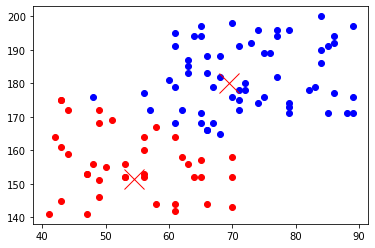

In [56]:
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1], 'o', color='b')
plt.plot(new_points[0][0], new_points[0][1],
                        'x', color='r', markersize=20) # 새기준점1
plt.plot(new_points[1][0], new_points[1][1],
                        'x', color='r', markersize=20) # 새기준점2

# 전체 코드

In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt
# 두 영역을 나누기 위해 두점 사잉의 거리를 구하는 함수 (0,0) ~ (4,3) : root(4**2+3**2)
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

data=[]
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)])#여
    data.append([random.randint(60,90),random.randint(170,200)]) #남

new_points =[[random.randint(40,90), random.randint(140,200)],
             [random.randint(40,90), random.randint(140,200)]]
print('초기 기준점 :', new_points)
for i in range(1, 11):
    group1 = []
    group2 = []
    for d in data:
        if dist(new_points[0], d) < dist(new_points[1], d):
            group1.append(d)
        else:
            group2.append(d)
    # group1과 group2의 중간지점으로 새 기준점 이동
    sumX = 0; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    new_points = []
    new_points.append([sumX/len(group1), sumY/len(group1)])
    sumX=0 ; sumY=0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    new_points.append([sumX/len(group2), sumY/len(group2)])
    print(i, '번째 기준점 :', new_points)

초기 기준점 : [[89, 166], [81, 163]]
1 번째 기준점 : [[83.12, 186.4], [59.36, 167.77333333333334]]
2 번째 기준점 : [[77.61904761904762, 188.14285714285714], [56.37931034482759, 161.05172413793105]]
3 번째 기준점 : [[75.9795918367347, 187.08163265306123], [55.03921568627451, 158.35294117647058]]
4 번째 기준점 : [[75.9, 186.74], [54.7, 158.12]]
5 번째 기준점 : [[75.70588235294117, 186.45098039215685], [54.46938775510204, 157.83673469387756]]
6 번째 기준점 : [[75.70588235294117, 186.45098039215685], [54.46938775510204, 157.83673469387756]]
7 번째 기준점 : [[75.70588235294117, 186.45098039215685], [54.46938775510204, 157.83673469387756]]
8 번째 기준점 : [[75.70588235294117, 186.45098039215685], [54.46938775510204, 157.83673469387756]]
9 번째 기준점 : [[75.70588235294117, 186.45098039215685], [54.46938775510204, 157.83673469387756]]
10 번째 기준점 : [[75.70588235294117, 186.45098039215685], [54.46938775510204, 157.83673469387756]]


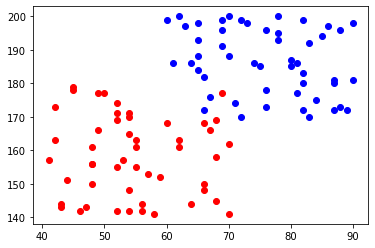

In [62]:
# 여자 vs 남자 
# 여자 몸무게 :[d[0] for d in data[0:100:2]]
# 여자 키 : [d[1] for d in data[0:100:2]]
# 남자 몸무게 :[d[0] for d in data[1:100:2]]
# 남자 키 : [d[1] for d in data[1:100:2]]
plt.plot([d[0] for d in data[0:100:2]], [d[1] for d in data[0:100:2]], 
         'o', color='r')
plt.plot([d[0] for d in data[1:100:2]], [d[1] for d in data[1:100:2]], 
        'o', color='b')

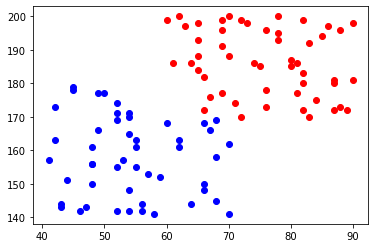

In [63]:
for g in group1:
    plt.plot(g[0], g[1], 'o', color='r')
for g in group2:
    plt.plot(g[0], g[1], 'o', color='b')